# Lab 5 Challenges: Intro to networks

Student ID: 220015902

# Challenge 1

It's time for you to apply everything you learned by analyzing a case study of FourSquare social Network. (Foursquare is a location-based online social network. The dataset contains a list of all of the user-to-user links)

Datasource: @inproceedings{gao2012exploring,
     title={Exploring social-historical ties on location-based social networks},
     author={Gao, Huiji and Tang, Jiliang and Liu, Huan},
     booktitle={Proceedings of the 6th International AAAI Conference on Weblogs and Social Media},
     year={2012}
}

- **Data**: `FS.csv` (avaliable in Moodle)

1. Read the FS network dataset.
2. Describe using the basic functions of the graph's size. Explore nodes and edges. Provide how many nodes and edges are present in the network.
3. The dataset generates a graph of 639.014 nodes, so it is massive and you won't see anything meaningful if you try to plot it. So you need to create a subset using the **degree centrality** to find out find the top 4 of the most important nodes, and use them to create a subset of the original network. 
4. Extract the degree centrality values and convert them into a list. Then, plot a histogram to visualize the distribution of node degrees in the original network.
5. Create a plot for the subset created.
6. Now calculate another relevant measure of the network -- **betweenness centrality**. Plot the betweenness centrality distribution of the subset you created. Tip: Same steps from the previous step, but use `nx.betweenness_centrality()`
7. Plot the Matrix, Arc and Circos from the subset.

In [1]:
cd ..

/Users/milliemccallum/Documents/Lab_assignment_2


In [7]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.filterwarnings('ignore')

In [23]:
import networkx as nx

In [24]:
import networkx as nx
import pandas as pd

# reading the FS network dataset 
graph_type = nx.Graph()
fs = pd.read_csv('Data/data_lab5/FS.csv')
G = nx.from_pandas_edgelist(fs)

In [6]:
# assessing the dataset and getting basic information

print(len(G))#finding the number of nodes
print(type(G.nodes())) 
print(list(G.edges(data=True))[-1]) # attributes associated with the last element of the edges list. 
print(list(G.nodes(data=True))[0]) # attributes associated with the first element of the node list.
print(type(list(G.edges(data=True))[-1][2]))

639014
<class 'networkx.classes.reportviews.NodeView'>
(94306, 128953, {})
(34802, {})
<class 'dict'>


In [5]:
# calculate degree centrality 
degree_centrality = nx.degree_centrality(G)

# Sort nodes by degree centrality in descending order and select only the first 4 nodes
top_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:4]

# Print the top 4 most important nodes and their degree centrality
for node in top_nodes:
    print(f"Node {node}: Degree Centrality = {degree_centrality[node]}")

Node 106223: Degree Centrality = 0.16622197044504572
Node 89302: Degree Centrality = 0.07327393965380986
Node 76517: Degree Centrality = 0.07275908314854314
Node 66999: Degree Centrality = 0.0726119812898955


In [6]:
# create a list of degree centrality for the whole network

degree_centrality_list = list(degree_centrality.values())

Text(0.5, 1.0, 'Histogram of degree centrality')

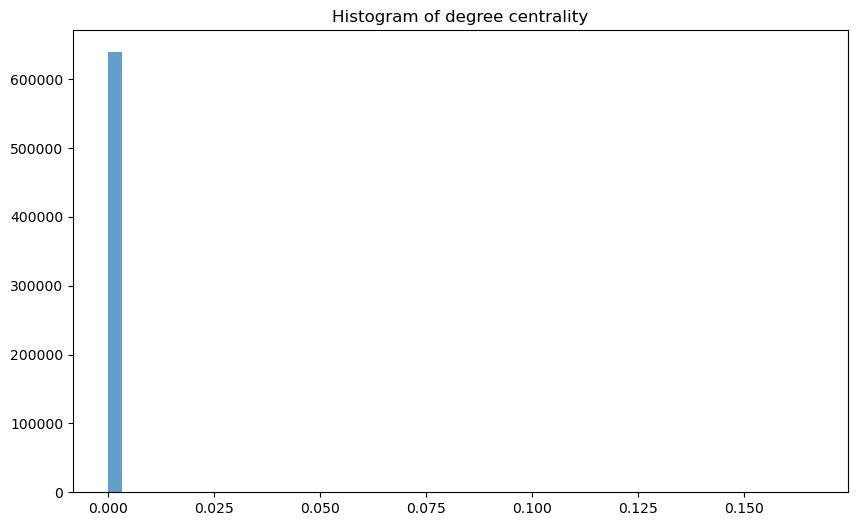

In [7]:
# plot a histogram of the degree centrality values 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(degree_centrality_list, bins=50, alpha=0.7)
plt.title("Histogram of degree centrality")

# The output of the histogram shows a very strong skew towards the left, with only one visible
# band around with very small values.
# the larger values of betweenness centrality have so few nodes that any bars of the histogram
# are not visible

In [8]:
# create a subset for the top four nodes using the networkx function .subgraph
# https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html

top_subset = G.subgraph(top_nodes)

In [9]:
# calculate the betweeness centrality for the top nodes subset 

betweenness_centrality = nx.betweenness_centrality(top_subset)

Text(0.5, 1.0, "Histogram of top nodes' degree centrality")

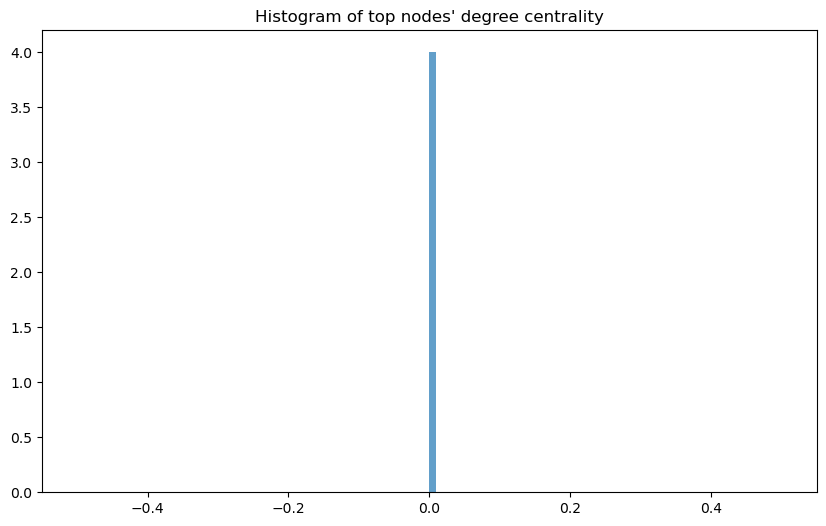

In [10]:
betweenness_centrality_list = list(betweenness_centrality.values())

# plot the histogram for betweeness 
plt.figure(figsize=(10, 6))
plt.hist(betweenness_centrality_list, bins=100, alpha=0.7)
plt.title("Histogram of top nodes' degree centrality")

This shows that all of the values of the betweenness centrality are centred around zero for the subset that was created 


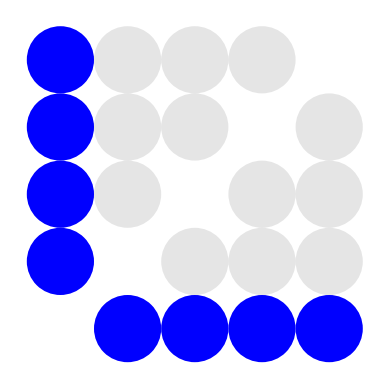

In [11]:
# create a plot for the Matrix

import nxviz as nv
nv.MatrixPlot(top_subset)
plt.show()

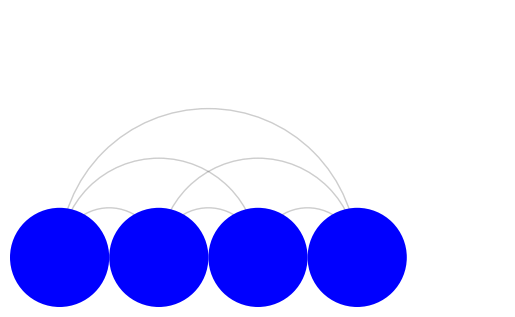

In [12]:
# create a plot for the Arc for the subset 
a = nv.ArcPlot(top_subset)
plt.show()

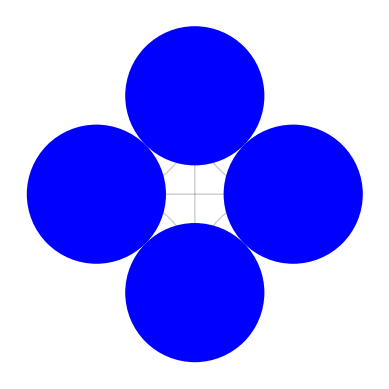

In [14]:
# plot the circos of the subset
nv.CircosPlot(top_subset)
plt.show()

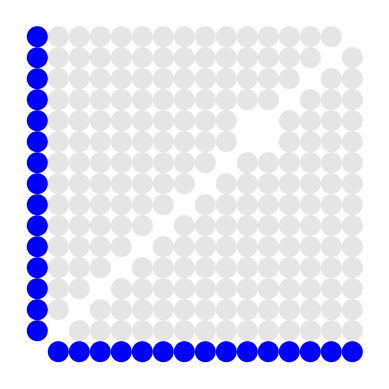

In [29]:
# The above plots are only for the 4 most important nodes and are therefore farily simply, 
# showing 4 nodes that all have edges connecting to each other 

# to create a more interesting plot, create a new subset with the top 15 nodes from the degree
# centrality list 

top_15_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:15]
top_15_subset = G.subgraph(top_15_nodes)

nv.MatrixPlot(top_15_subset)
plt.show()

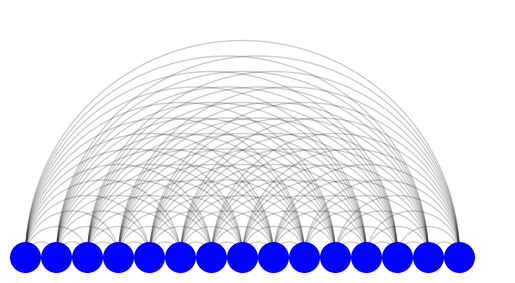

In [30]:
# plot the arc for this new subset

nv.ArcPlot(top_15_subset)
plt.show()

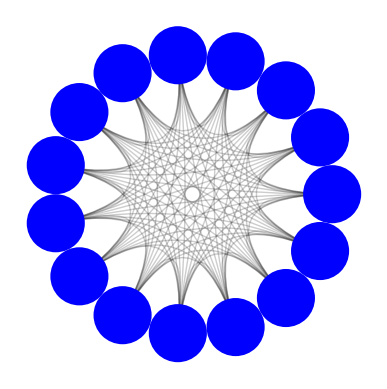

In [31]:
# plot the circos for this new subset

nv.CircosPlot(top_15_subset)
plt.show()

The above cells and their outputs show the interconnectivity of the nodes in the given network. As this is a very large dataset, the most connected nodes were made into a subset to allow the lines of code to run without crashing. 

The plots for the subset of the top four nodes are shown above, however, as these are the most connected nodes, they all connect to each other, generating very simple graphs. To show further complexity, I created another subset with the top 15 nodes, and while this encounters a similar issue of all nodes connecting, it produces slightly more interesting plots. 

These plots allow you to assess the interconnectivity of all of the nodes and their associated edges


# Challenge 2

This challenge is about OSMnx. You will explore and analyze a city's street network using the OSMnx Python library.

1. Use OSMnx to download the street network of a city of your choice. You can specify the city name, BBox or a Dict.
2. Calculate basic statistics for the street network, such as the number of nodes, edges, average node degree, etc.
3. Use OSMnx to plot the street network. Customize the plot to make it visually appealing, including node size, edge color. See the potential options here: https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.plot
4. Utilize the routing capabilities of OSMnx to find the shortest path between two points in the street network. Plot the route on top of the street network.
5. Calculate the centrality measures (e.g., degree centrality and betweenness_centrality) for nodes in the street network.
6. Create the figure-groud from the selected city
7. Create interactive maps to plot nodes, edges, nodes+edges and one of the centrality measures.
8. Export the street network to a GeoPackage (.gpkg) file. Ensure that the exported file contains both node and edge attributes. Demonstrate that the new GeoPackage can be used and read in Python using any of the libraries we have seen in the class to create a simple and interactive map.
9. Finally, use OSMnx to extract other urban elements (e.g., buildings, parks) and plot them.

In [1]:
import networkx as nx
import osmnx as ox

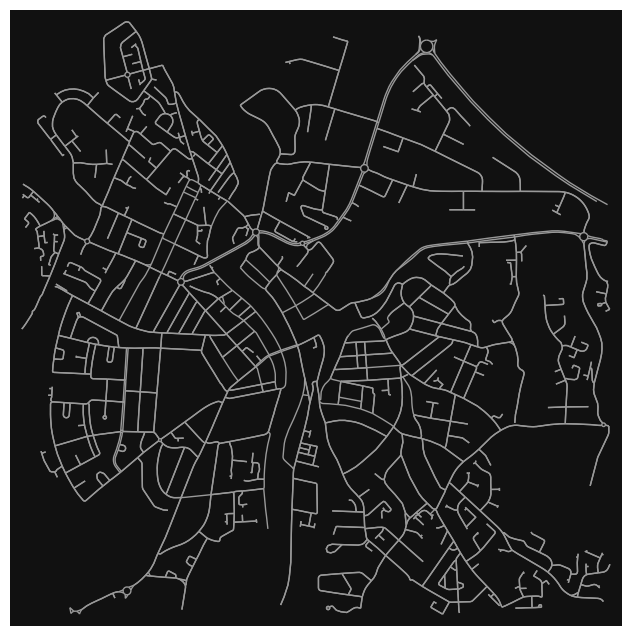

In [2]:
# downloading the street network for Inverness, Scotland using bounding box method
inverness = (57.47837655399627, -4.22521540379609)
one_mile = 1609   # meters
G = ox.graph_from_point(inverness, dist=one_mile, network_type="drive")
fig, ax = ox.plot_graph(G, node_size=0)

In [8]:
# calculating the total area that the graph covers

warnings.filterwarnings('ignore')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
inverness_area_m = nodes_proj.unary_union.convex_hull.area
inverness_area_m

9297941.808395285

In [9]:
# calculating basic statistics about the network and understanding it 

ox.basic_stats(G_proj, area=inverness_area_m, clean_int_tol=15)

{'n': 987,
 'm': 2195,
 'k_avg': 4.447821681864235,
 'edge_length_total': 195734.8410000001,
 'edge_length_avg': 89.1730482915718,
 'streets_per_node_avg': 2.5045592705167175,
 'streets_per_node_counts': {0: 0, 1: 268, 2: 8, 3: 659, 4: 49, 5: 3},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.27152988855116517,
  2: 0.008105369807497468,
  3: 0.6676798378926039,
  4: 0.04964539007092199,
  5: 0.00303951367781155},
 'intersection_count': 719,
 'street_length_total': 108517.79699999992,
 'street_segment_count': 1212,
 'street_length_avg': 89.5361361386138,
 'circuity_avg': 1.0640597596973544,
 'self_loop_proportion': 0.004125412541254125,
 'clean_intersection_count': 546,
 'node_density_km': 106.15252497158235,
 'intersection_density_km': 77.32894169662382,
 'edge_density_km': 21051.416005127874,
 'street_density_km': 11671.163278524413,
 'clean_intersection_density_km': 58.722673388534915}

In [10]:
# plotting street centrality 

# converting graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, "edge_centrality")

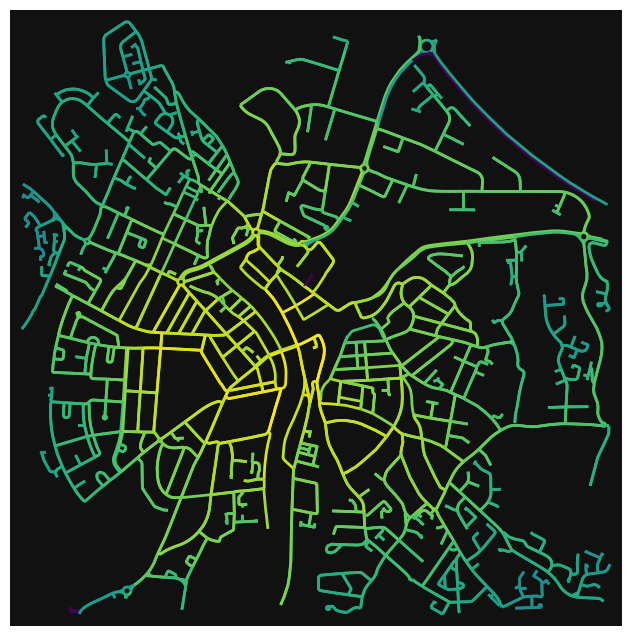

In [11]:
# plotting the centrality which measures the centrality of each edge

ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="viridis")
fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)

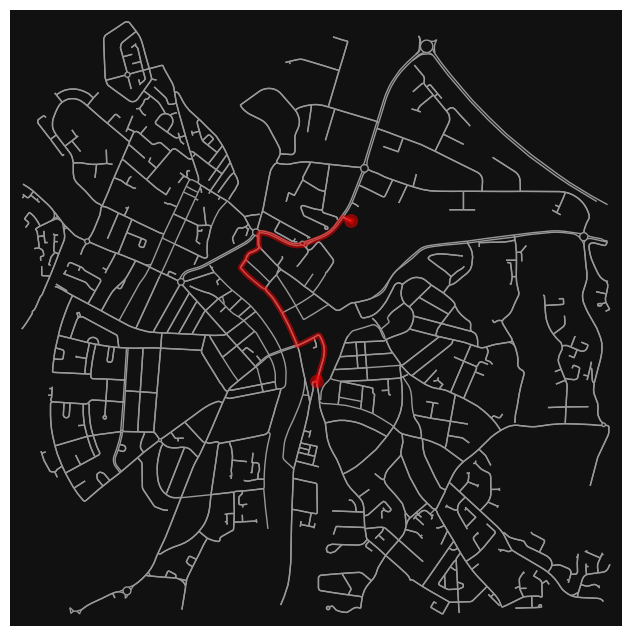

In [12]:
# calculating a route between two points in inverness

orig = ox.distance.nearest_nodes(G, X=-4.221869027260455, Y=57.4834735687117)
dest = ox.distance.nearest_nodes(G, X=-4.224866822906962, Y=57.47541546152747)

route = ox.shortest_path(G, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(G, route, node_size=0)



In [13]:
# calculating degree centrality for the graph

degree_centrality = nx.degree_centrality(G)


In [14]:
# calculating betweeness centrality
betweenness_centrality = nx.betweenness_centrality(G)


In [15]:
from IPython.display import Image

In [16]:
# configure the inline image display
img_folder = "images"
extension = "png"
size = 240
dpi = 40

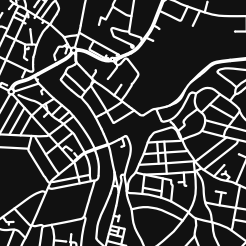

In [17]:
place = "inverness"
point = (57.47837655399627, -4.22521540379609)
fp = f"./{img_folder}/{place}.{extension}"
fig, ax = ox.plot_figure_ground(
    point=point,
    network_type="drive",
    filepath=fp,
    dpi=dpi,
    save=True,
    show=False,
    close=True,
)
Image(fp, height=size, width=size)

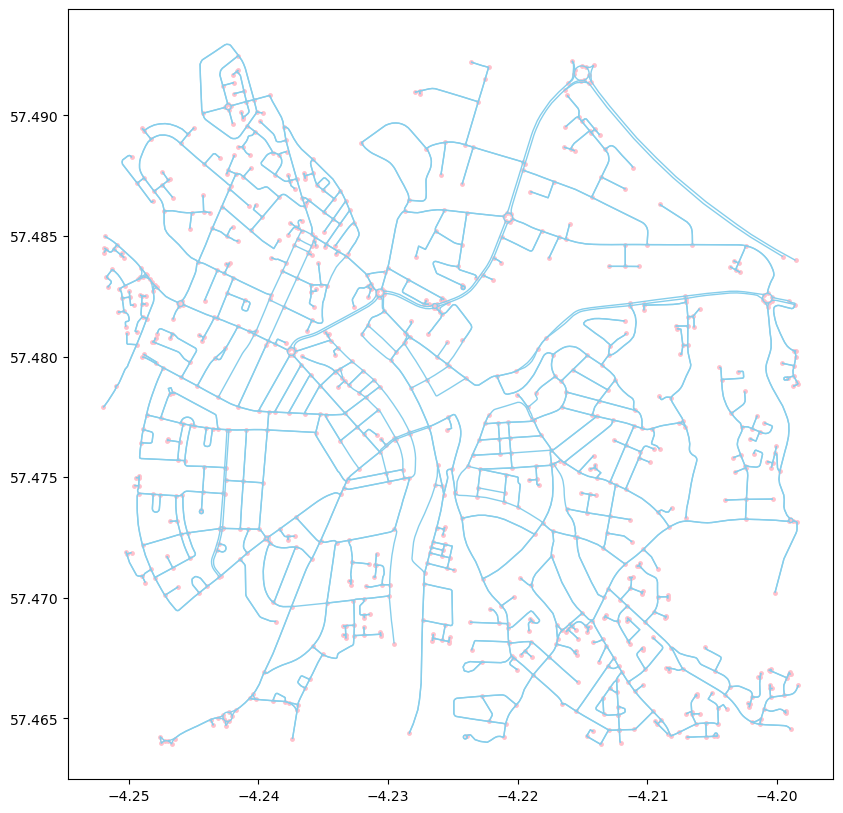

In [18]:
# exploring nodes and edges using .plot
import matplotlib.pyplot as plt

nodes, edges = ox.graph_to_gdfs(G)
fig, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, color='skyblue', linewidth=1)
nodes.plot(ax=ax, color='pink', markersize=6)
plt.show()

In [19]:
# exploring graph nodes interactively and colored by degree centrality
nx.set_node_attributes(G, nx.degree_centrality(G), name="bc")


nodes = ox.graph_to_gdfs(G, edges=False)
nodes.explore(tiles="cartodbdarkmatter", column="bc", marker_kwds={"radius": 8})

importing screenshot for the above interactive plot as it will not load in the pdf

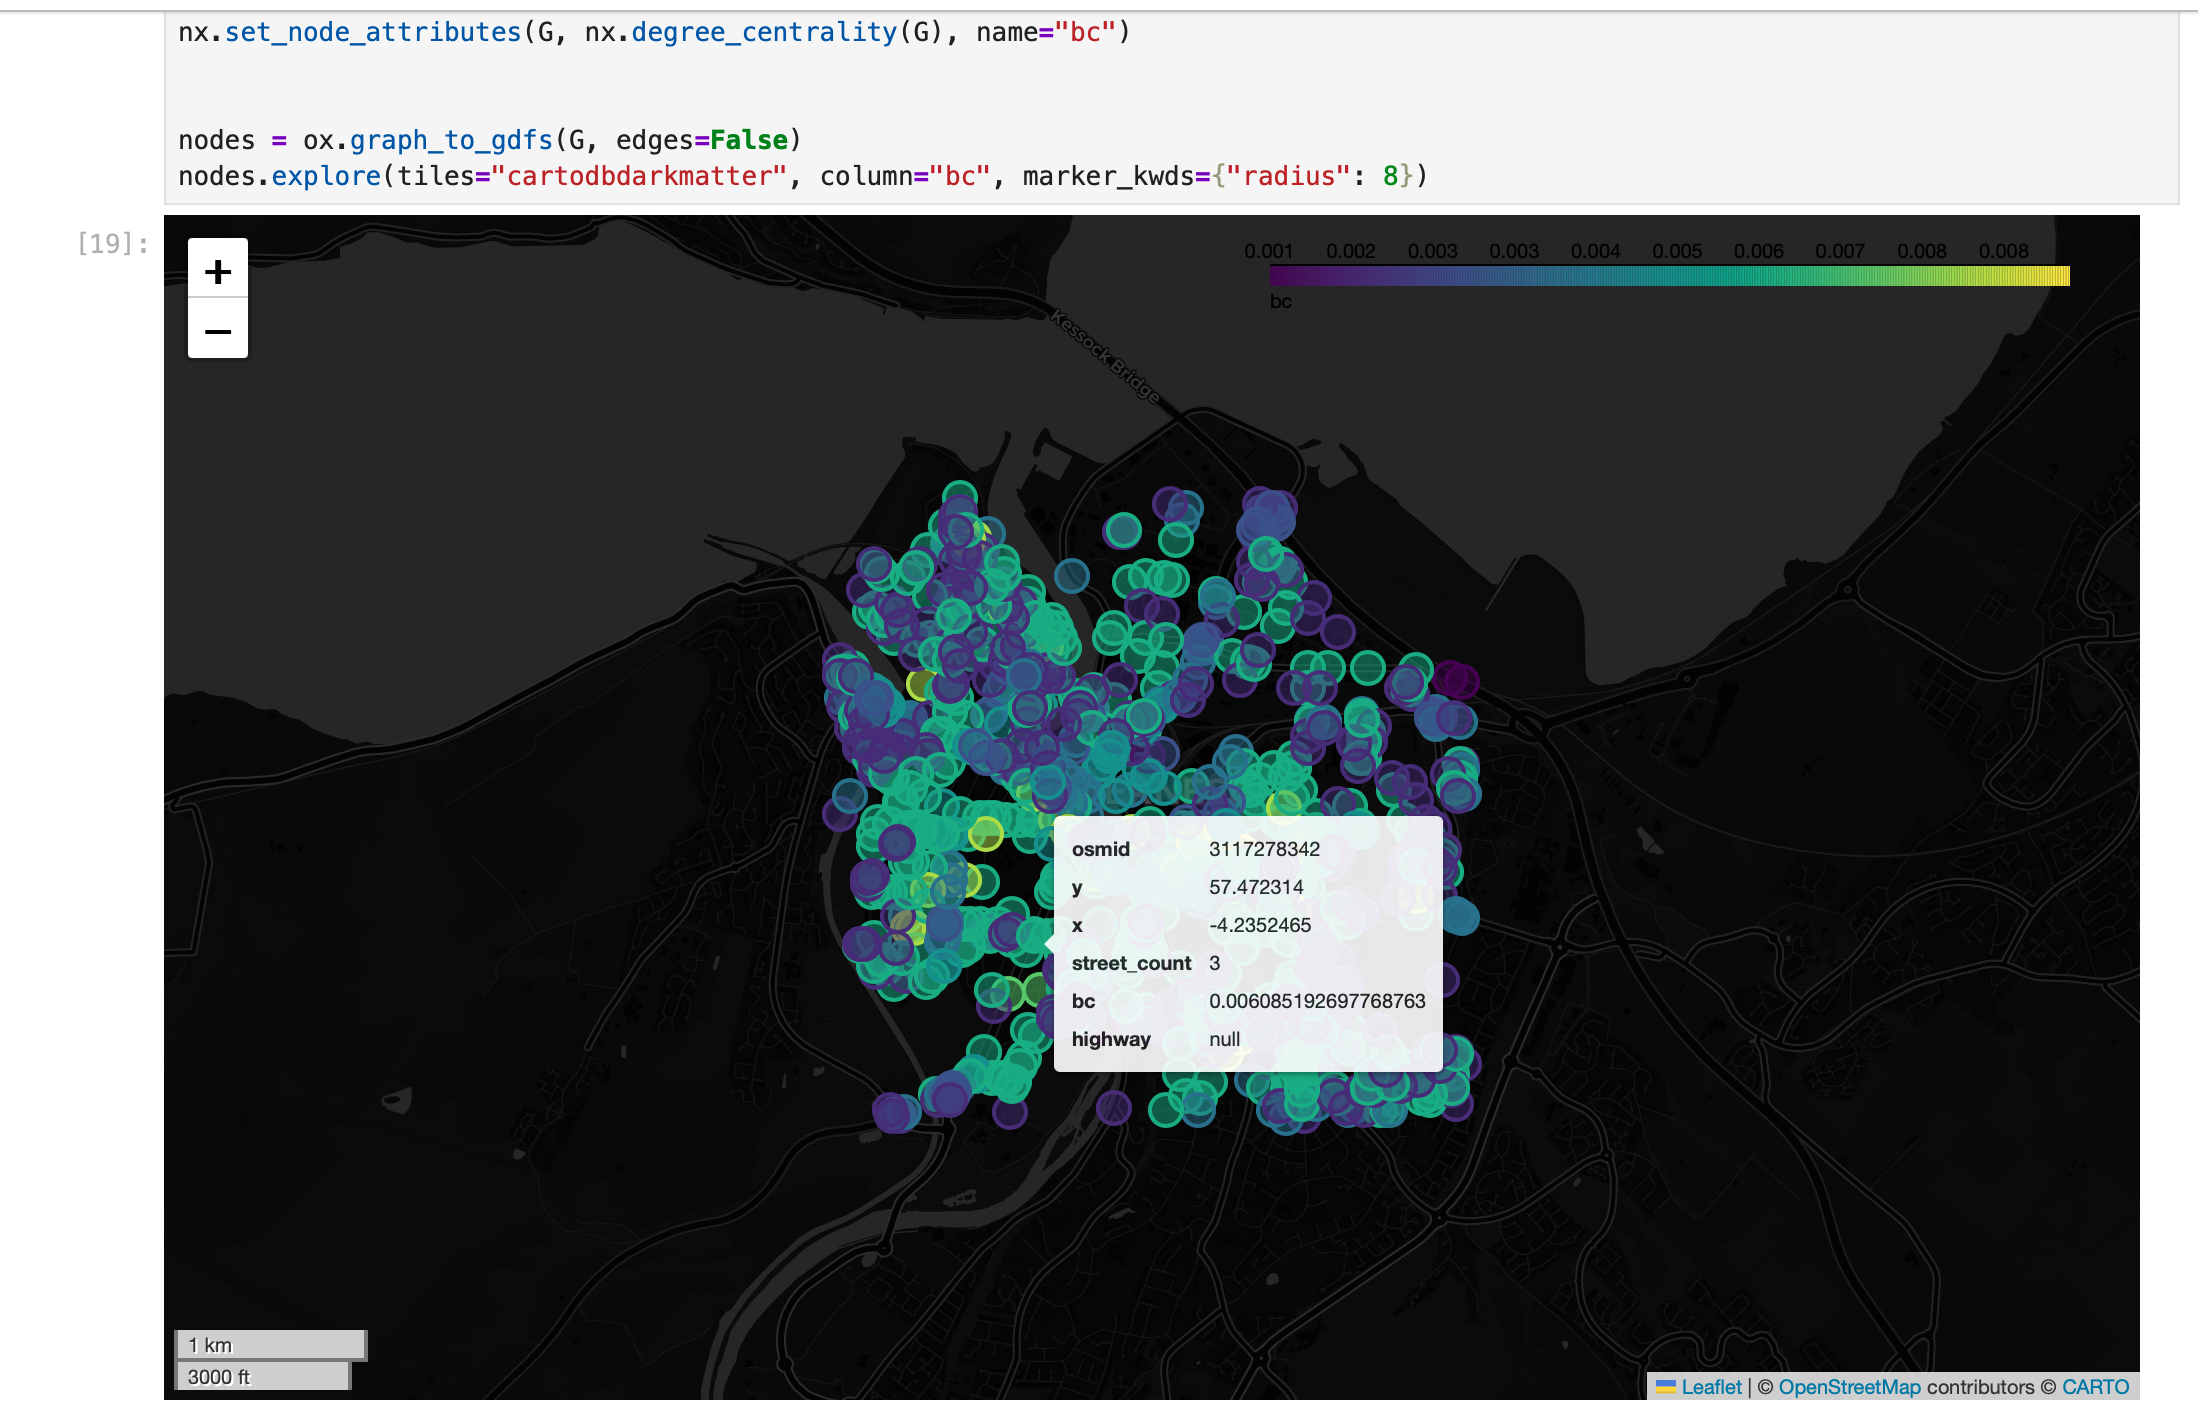

In [38]:
# Save graph to disk as geopackage (for GIS) or graphml file (for gephi etc)
ox.save_graph_geopackage(G, filepath="./data/mynetwork.gpkg")
ox.save_graphml(G, filepath="./data/mynetwork.graphml")

In [47]:
# using OSMnx to extract other building footprints

place = "Inverness"
tags = {"building": True}
gdf = ox.features_from_place(place, tags)
gdf.shape

(665, 18)

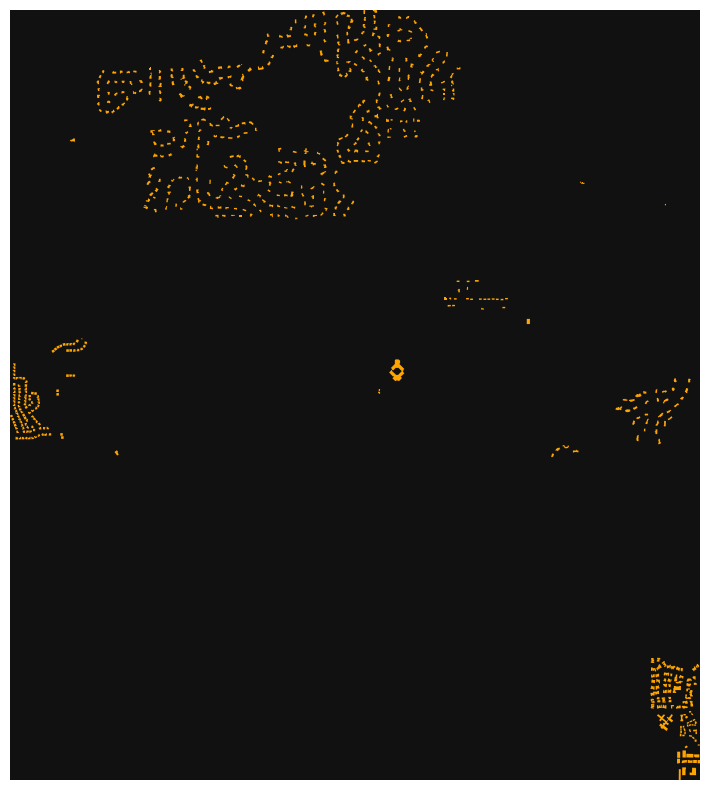

In [45]:
warnings.simplefilter('ignore', DeprecationWarning)

fig, ax = ox.plot_footprints(gdf, figsize=(12, 10))

This challenge contextualises nodes and edges in the form of streets and buildings, allowing the user to create maps, plan the shortest route between edges and visualise building density. This is useful for better understanding urban networks, assessing urban planning and creating interactive displays